In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#from wordcloud import WordCloud, STOPWORDS
#from PIL import Image

In [2]:
eng_stops = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', \
             "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',\
             'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', \
             'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',\
             'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
             'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', \
             'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', \
             'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',\
             'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', \
             'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', \
             'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', \
             'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', \
             'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",\
             'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", \
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", \
             'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan',\
             "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',\
             "wouldn't"]

### Making a test file

In [3]:
###Make a test file
def write_test(infile, outfile = 'test.txt', lines = 10):
    with open(infile, 'r') as data_in: #opens file for reading
        with open(outfile, 'w') as data_out: #open file for writing
            for i in range(lines): #0 1 2 3 4 5 6 7 8 9, how many times to run loop
                data_out.write(next(data_in))

In [4]:
write_test('arthropod.txt', 'test_file.txt', 20)

### NLTK reminder and how to make plots otherwise

In [6]:
with open('arthropod.txt', 'r') as file: #open file
    text = file.read().lower() #read in text, puts in lowercase
    tokens = text.translate(text.maketrans('/',' ', '.,;:!?[]()')).split() #Anything you want to add?
    tokens = [token for token in tokens \
              if token not in eng_stops and not token.isdigit()] #Anything you want to add? Part 2
print(tokens[0:40])

['biting', 'piercing', 'arthropods', 'black', 'widow', 'spider', 'latrodectus', 'mactans', 'illustration', 'unlabelled', 'identification', 'female', 'black', 'widow', 'shiny', 'black', 'body', 'approximately', 'cm', 'long', 'usually', 'red', 'hourglass-shaped', 'marking', 'underside', 'globose', 'abdomen', 'individuals', 'distinct', 'hourglass', 'marking', 'replaced', 'several', 'triangles', 'spots', 'irregular', 'longitudinal', 'blotch', 'slim', 'black']


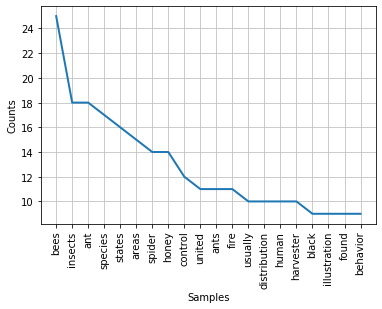

In [7]:
bugs = nltk.FreqDist(tokens) #return this is on the project and not bugs.plot
#print(bugs.most_common(20))
bugs.plot(20)

In [8]:
#autocomplete example in reading
#a better top words - how does this work?
def top_words(tally, num = 10):
    inv = {} #empty dictionary
    for w,n in tally.items():
        if n in inv: #is key already in new dictionary
            inv[n].add(w) #add to the existing values
        else: #key not in dictionary
            inv[n] = {w} #add the key as a set
    tg = sorted(inv, reverse = True)[0:num] #list of occurences, sorting, slicing
    result = {}
    for val in tg: #flipping inverse dictionary back around
        if len(result) < num: #checking that we haven't added too many things
            for item in inv[val]: #pulling the strings out of the set
                result[item] = val #adding to new dictionary
    return result

In [9]:
top_20 = top_words(dict(bugs), 20)
print(top_20)

{'bees': 25, 'ant': 18, 'insects': 18, 'species': 17, 'states': 16, 'areas': 15, 'honey': 14, 'spider': 14, 'control': 12, 'united': 11, 'fire': 11, 'ants': 11, 'human': 10, 'usually': 10, 'distribution': 10, 'harvester': 10, 'occur': 9, 'black': 9, 'bugs': 9, 'found': 9, 'treatment': 9, 'bee': 9, 'illustration': 9, 'behavior': 9, 'envenomization': 9}


In [ ]:
#What is plt????? What is sns?
sns.set_style('whitegrid')
plt.figure(figsize = [6,4])
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.xticks(rotation = 90) 
sns.lineplot(list(top_20.keys()),list(top_20.values()), sort=False)

### If you managed to install wordcloud

In [ ]:
text = open('arthropod.txt','r',encoding = 'UTF-8')
up_text = text.read().upper()
text.close()
stopwords = set(STOPWORDS)
stopwords.add('AREA')
wc = WordCloud(margin=10,random_state=1, stopwords=stopwords, colormap='jet').generate(up_text)
wc.to_file('test.png')
plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
text = open('Tell_Tale_Heart.txt','r',encoding = 'UTF-8')
up_text = text.read().upper()
text.close()
stopwords = set(STOPWORDS)
stopwords.add('UPON')
wc = WordCloud(font_path='Verdana.ttf',background_color="black", stopwords = stopwords, 
               mask=np.array(Image.open("heart2.jpg"))).generate(up_text)
wc.to_file('test.png')
plt.figure(figsize = [8,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Another dictionary example

In [23]:
#gradebook
#Create this by reading in from a file for several students
gradebook = {}
with open('Student_Data.txt', 'r', encoding = 'UTF-8') as grades: #open file
    for line in grades: #read in line by line
        items = line.rstrip('\n').split('\t')
        print(items)
        gradebook[items[0]] = int(item) if len(item) > 0 else 0\
        for item in items[1:]] #add to dictionary
print(gradebook)
#grades = gradebook['Student A']
#print(grades)
#print(sum(grades)/len(grades))

SyntaxError: invalid syntax (<ipython-input-23-bdee73603024>, line 9)

In [11]:
def make_gradebook(filename, delimiter = ','):
    pass
test = {100:'cheese'}
test[umbrella]

None


In [ ]:
a = make_gradebook('Student_Data.txt')
print(a)

In [ ]:
#How would I find the averages for the students? Suppose all assignments equally weighted

In [ ]:
def get_final_grades(gradebook):
    grades = {}
    for k,v in gradebook.items():
        pass #do what?????
    return grades

In [ ]:
get_final_grades(a)

### Why do we want to use pandas?

In [24]:
gradebook = pd.read_table('Student_Data.txt', header = None, index_col = 0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [25]:
gradebook

,1,2,3,4
0,,,,
Student A,90.0,95.0,96.0,97.0
Student B,89.0,83.0,84.0,82.0
Student C,78.0,NaN,77.0,76.0
Student D,NaN,67.0,NaN,NaN
Student E,42.0,NaN,46.0,NaN


In [ ]:
gradebook.replace(np.nan, 0, inplace = True)
gradebook

In [ ]:
gradebook.loc['Student A']

In [ ]:
finals = gradebook.mean(axis = 1)
finals